# Proyecto: Análisis mercado inmobiliario de la Ciudad de Buenos Aires

*By*: **Fernando Emmanuel Quintana**

### ETAPA 1: EXPLORACION DE LOS DATOS DEL DATASET

En este proyecto voy a trabajar con un dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo es comenzar con el primer paso en el proceso de exploración de datos, primeros pasos que debe realizar un Data Scientist antes de poder comenzar con la creación del Modelado Predictivo.

Voy a enfocarme en analizar algunos aspectos del mercado inmobiliario de la Ciudad de Buenos Aires pero para eso primero se debe limpiar un poco el dataset.

**El dataset: propiedades en venta en Ciudad de Buenos Aires. Detalle de la muestra del conjunto de datos de propiedades en venta mencionado. En este dataset, cada fila es una propiedad en venta.**

### Los atributos
*A continuación vamos a describir los atributos (Columanas o Features) que consideramos en esta muestra:*

* **id**: id de la propiedad
* **created_on**: fecha en la que la propiedad ingresó al sitio
* **operation**: alquiler (rent) o venta (sell)
* **property_type**: tipo de propiedad (casa, departamento, ph, etcétera)
* **place_with_parent_names**: nombre del lugar donde se encuentra la propiedad según el publicador
* **lat-lon**: coordenadas concatenadas
* **lat**: latitud
* **lon**: longitud
* **price**: precio en la moneda especificada en currency
* **currency**: divisa en la que está expresada la publicación
* **price_aprox_usd**: precio aproximado en dólares estadounidenses
* **surface_total_in_m2**: superficie total (en metros cuadrados)
* **surface_covered_in_m2**: superficie cubierta (en metros cuadrados)
* **price_usd_per_m2**: precio por metro cuadrado en dólares (precio dólares / superficie)
* **floor**: número de piso (si corresponde)
* **rooms**: cantidad de ambientes
* **expenses**: expensas (si corresponde)
* **barrio**: barrio según cartografía oficial
* **properati_url**: url de la publicación en Properati


### Importando las bibliotecas necesarias
Para poder trabajar en la limpieza de datos y la visualización de nuestro dataset voy a utilizar las bibliotecas **numpy**, **pandas**, **matplotlib.pylab** y **seaborn** de python.

In [1]:
#importo bibliotecas y librerias en esta celda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# La siguiente linea es para poder extraer los graficos de la notebook 
%matplotlib inline
# Configuro el tamaño de todos los graficos generales
plt.rcParams['figure.figsize']=(12,8)

### Cargando dataset de propiedades

**2) Cargo** el dataset y lo almaceno en una variable llamada **df**, utilizando **parse_dates** sobre la columna **created_on**

In [2]:
df=pd.read_csv("C:/Users/Agustín/Desktop/Programación - Python/4.Datasets/datos_properati.csv", parse_dates=['created_on'])

**Lo primero es ver qué forma tiene el dataset cargado**

In [3]:
#muestro solo las tres primeras filas:
df.head(3)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.25641,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,PALERMO,14.0
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.92562,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local...,PALERMO,14.0
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.47541,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local...,PALERMO,14.0


### Categorías de propiedades
En primer lugar vamos a ver qué categorías existen en el campo `property_type`. Y de esas categorías cuantos valores tenemos de cada uno.

In [4]:
#muestro primero categorias del campo (columna de mi dataframe):
set(df['property_type'].values)

{'PH', 'apartment', 'house', 'store'}

In [5]:
df['property_type'].value_counts()

apartment    14807
house         1618
PH            1463
store         1091
Name: property_type, dtype: int64

### Filtrando las categorías

De las categorías existentes sólo quiero quedarme con las que sean casas (house), departamentos (apartment) o PH (PH). 
**4) filtro** el `dataframe` original creando un **nuevo** `dataframe` llamado `df_filtered`. Este es el `dataframe` que seguiré usando a lo largo del análisis.

In [6]:
#filtro el dataframe en esta celda:
df_filtered=df[df.loc[:,'property_type']!='store']
df_filtered.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,PALERMO,14.0
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_depar...,PALERMO,14.0
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_depar...,PALERMO,14.0
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_depar...,PALERMO,14.0
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hol...,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_...,PALERMO,14.0


In [7]:
df_filtered.shape

(17888, 17)

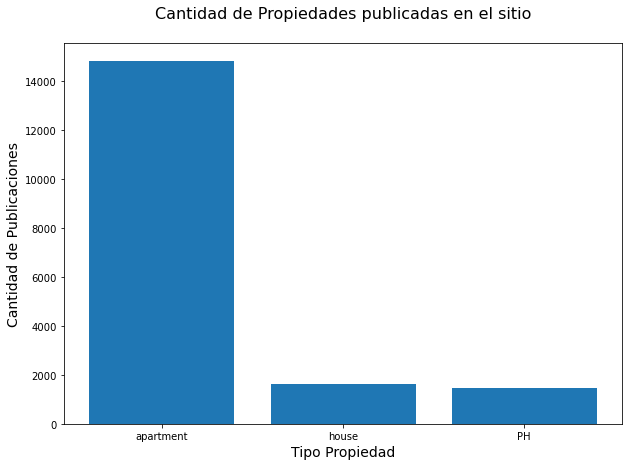

In [8]:
#Creo el grágico y seteo el tamaño:
plt.figure(figsize=(10,7))

#Elijo el tipo de gráfico con los datos, el color y la opacidad, entre otros.
plt.bar(df_filtered['property_type'].value_counts().index, df_filtered['property_type'].value_counts())

#Elijo los títulos de los ejes con sus estilos:
plt.ylabel('Cantidad de Publicaciones', size=14)
plt.xlabel('Tipo Propiedad', size=14)
plt.title('Cantidad de Propiedades publicadas en el sitio', size=16, pad=25)

#Ajustes adicionales:
plt.grid(False)

#Mostar el gráfico:
plt.show();

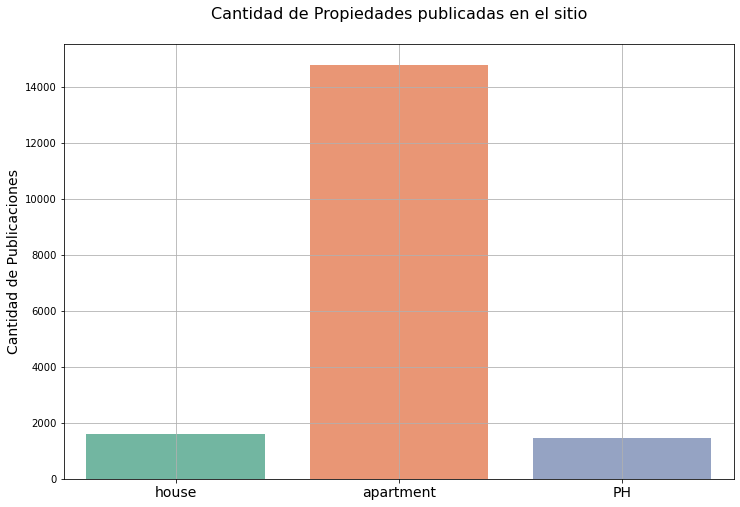

In [9]:
# Grafica en seaborn
sns.countplot(x='property_type', data=df_filtered, palette='Set2')
plt.ylabel('Cantidad de Publicaciones', size=14)
plt.xlabel('', size=14)
plt.title('Cantidad de Propiedades publicadas en el sitio', size=16, pad=25)
plt.xticks(size=14)
plt.grid(True)

### Valores Faltantes

Vamos a querer descartar aquellas instancias que tengan valores nulos en columnas importantes para el análisis del mercado.
Estas columnas son las que informan **superficie (total o cubierta)**, **cantidad de ambientes**, **precio** y **precio por metro cuadrado**.
**6) Quito** del `dataframe` las instancias que no tengan ningún valor en los campos nombrados.

In [10]:
#primero muestro todas las columnas con valores nulos para tener una idea al respecto
columnas_NaN=df_filtered.isnull().sum()
columnas_NaN

created_on                     0
operation                      0
property_type                  0
place_with_parent_names        0
lat-lon                        0
lat                            0
lon                            0
price_aprox_usd             1377
surface_total_in_m2         2197
surface_covered_in_m2       1920
price_usd_per_m2            2681
floor                      15168
rooms                       4481
expenses                   14190
properati_url                  0
barrio                         0
comuna                         0
dtype: int64

In [11]:
#segundo, agrupo las columnas con valores faltantes que me interesen para el análisis:
subconjunto_NaN=df_filtered[['surface_total_in_m2','surface_covered_in_m2','rooms','price_aprox_usd','price_usd_per_m2']].isnull().sum()
subconjunto_NaN

surface_total_in_m2      2197
surface_covered_in_m2    1920
rooms                    4481
price_aprox_usd          1377
price_usd_per_m2         2681
dtype: int64

In [12]:
#tercero, quito todas las filas con NaN de las columnas solicitadas siempre y cuando la/las columnas tengan todos 
#los valores faltantes en la misma, por eso aplico "all" en how.
df_filtered.dropna(subset=['surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'price_aprox_usd', 'price_usd_per_m2'], how='all', inplace=True)

C:\Users\Agustín\AppData\Local\Temp\ipykernel_4932\1455500809.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['surface_total_in_m2', 'surface_covered_in_m2', 'rooms', 'price_aprox_usd', 'price_usd_per_m2'], how='all', inplace=True)


**7)** A continuación **muestro** cuantas instancias son las que descarté a partir de quitar las que tenían valores nulos.

In [13]:
original=df.shape[0]
no_filtradas=df_filtered.shape[0]
filtrado=original-no_filtradas
print('la cantidad de istancias descartadas es {}:' .format(filtrado))



la cantidad de istancias descartadas es 1893:


Posiblemente existan otros atributos con valores faltantes en el dataset, pero que no son de tanta importancia. 
**8) Muestro** qué otros atributos tienen valores faltantes en el `dataframe`.

In [14]:
missing_data=pd.concat([columnas_NaN, subconjunto_NaN]).loc[columnas_NaN.index.symmetric_difference(subconjunto_NaN.index)]
missing_data

barrio                         0
comuna                         0
created_on                     0
expenses                   14190
floor                      15168
lat                            0
lat-lon                        0
lon                            0
operation                      0
place_with_parent_names        0
properati_url                  0
property_type                  0
dtype: int64

Respuesta: además de los analizados, los atributos con valores faltantes son: **'floor' y 'expenses'**

#### Como desafío planteo como estrategia posible para reemplazar los valores faltantes en el atributo `surface_total_in_m2`, utilizar el promedio de los valores de esa columna para imputarlos en los faltantes.

In [15]:
#Como estrategia adoptaré reemplazar los valores NaN del atributo 'surface_total_in_m2', por el promedio de la columna:
#primero cuento los valores
df_filtered['surface_total_in_m2'].isnull().sum()

1395

#  Breakpoint

In [16]:
#ahora reemplazo por el promedio:
df_filtered['surface_total_in_m2'].fillna(df_filtered['surface_total_in_m2'].mean(), inplace=True)

C:\Users\Agustín\AppData\Local\Temp\ipykernel_4932\3973082144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['surface_total_in_m2'].fillna(df_filtered['surface_total_in_m2'].mean(), inplace=True)


In [17]:
#corroboro efectivament el cambio:
df_filtered['surface_total_in_m2'].isnull().sum()

0

### Datos erróneos

El siguiente paso es analizar errores que puede llegar a haber en el dataset. 
Por ejemplo, la **superficie total no puede ser menor que la cubierta**. Si esto sucede, podemos optar por eliminar esas filas o intentar corregir el problema. Veamos en primer lugar si esto sucede.
**9) Muestro** cuantas instancias existen que tengan el problema de este dato erróneo y las almaceno en una variable llamada `wrong_surface_rows`

In [18]:
wrong_surface_rows=df_filtered[df_filtered['surface_total_in_m2'].astype(float)<=df_filtered['surface_covered_in_m2']]
wrong_surface_rows.shape

(5097, 17)

Proponemos no borrar estas instancias erróneas, sino intercambiar los valores de **superficie total** con **superficie cubierta** en caso de que se cumpla la condición mencionada.

In [19]:
df_filtered.at[wrong_surface_rows.index, 'surface_total_in_m2']= wrong_surface_rows.surface_covered_in_m2
df_filtered.at[wrong_surface_rows.index, 'surface_covered_in_m2']= wrong_surface_rows.surface_total_in_m2

InvalidIndexError: Int64Index([   20,    26,    32,    33,    37,    38,    44,    45,    50,
               52,
            ...
            18959, 18960, 18963, 18964, 18970, 18971, 18972, 18973, 18974,
            18977],
           dtype='int64', length=5097)

In [20]:
df_filtered.reset_index().head()

,index,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,PALERMO,14.0
1,18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_depar...,PALERMO,14.0
2,19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_depar...,PALERMO,14.0
3,20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_depar...,PALERMO,14.0
4,22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hol...,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_...,PALERMO,14.0


Por otro lado, sucede que las inmobiliarias cuando no cuentan con las coordenadas reales de las propiedades utilizan valores que no son correctos. Por ejemplo, el punto centro de cada barrio o puntos de interés como el Obelisco. Esto puede afectar el análisis relacionado con la ubicación de cada propiedad.

Veamos en primer lugar si hay coordenadas que se repiten.

In [21]:
conteo_de_puntos=df_filtered.groupby(['lat', 'lon']).size()
conteo_de_puntos[conteo_de_puntos>1].sort_values(ascending=False).head(10)



lat         lon       
-34.589546  -58.397364    155
-34.571150  -58.423297    127
-34.562084  -58.456686     87
-34.620928  -58.445874     49
-34.609821  -58.392606     44
-34.622973  -58.439913     41
-34.608608  -58.448515     40
-34.617719  -58.362056     36
-34.603771  -58.381587     36
-34.621184  -58.373116     32
dtype: int64

Por ejemplo, para el caso del tercer punto, se puede verificar que corresponde a la esquina de Av. Cabildo y Juramento.
Nos quedamos entonces con las propiedades con coordenadas que se repitan hasta 5 veces.

In [23]:
conteo_de_puntos.name='conteo'
df_filtered=df_filtered.join(conteo_de_puntos, on=['lat', 'lon'])
df_filtered=df_filtered[df_filtered.conteo<=5]

ValueError: columns overlap but no suffix specified: Index(['conteo'], dtype='object')

In [25]:
df_filtered.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,conteo
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,PALERMO,14.0,1
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_depar...,PALERMO,14.0,1
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_depar...,PALERMO,14.0,1
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_depar...,PALERMO,14.0,1
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hol...,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_...,PALERMO,14.0,1


Eliminamos el atributo `conteo` dado que ya no nos sirve.

In [26]:
df_filtered.shape

(14640, 18)

In [27]:
df_filtered.drop('conteo', inplace=True, axis=1)


In [28]:
df_filtered.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,PALERMO,14.0
18,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.588912403,-58.4134942185",-34.588912,-58.413494,340000.0,130.0,120.0,2615.384615,NaN,4.0,8000.0,https://www.properati.com.ar/1dzv6_venta_depar...,PALERMO,14.0
19,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5770327,-58.4233675",-34.577033,-58.423368,222000.0,52.0,48.0,4269.230769,NaN,1.0,NaN,https://www.properati.com.ar/1e05k_venta_depar...,PALERMO,14.0
20,2017-08-29,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.5950139,-58.4273915",-34.595014,-58.427392,180000.0,70.0,70.0,2571.428571,NaN,NaN,3000.0,https://www.properati.com.ar/1e0mq_venta_depar...,PALERMO,14.0
22,2017-08-30,sell,house,|Argentina|Capital Federal|Palermo|Palermo Hol...,"-34.5793535,-58.4364489",-34.579354,-58.436449,1200000.0,532.0,334.0,2255.639098,NaN,6.0,NaN,https://www.properati.com.ar/1e1ve_venta_casa_...,PALERMO,14.0


### Estudiando los barrios

#### Barrios con más edificios y barrios con más casas
Al saber qué barrios son los que tienen más cantidad de edificios en venta y cuáles son los que tienen más casas podemos darnos una idea de qué tipo de barrio es. Si es más residencial, con más población, poder adquisitivo, etc. 
Para eso vamos a empezar calculando los porcentajes de cada tipo de propiedad según el barrio.

In [29]:
total_propiedades=df_filtered.groupby('barrio')['property_type'].count().values

In [30]:
porcentaje_casas_ph=df_filtered[df_filtered.property_type.isin(['PH','house'])].groupby('barrio').count().property_type/total_propiedades

In [31]:
porcentaje_edificios=df_filtered[df_filtered.property_type=='apartment'].groupby('barrio').count().property_type/total_propiedades

In [32]:
print('barrios con mayor porcentaje de casas y PH: \n', porcentaje_casas_ph.sort_values()[::-1][:5])
print('barrios con mayor porcentaje de edificios: \n', porcentaje_edificios.sort_values()[::-1][:5])

barrios con mayor porcentaje de casas y PH: 
 barrio
VILLA RIACHUELO      0.739130
VERSALLES            0.666667
MATADEROS            0.613636
PARQUE AVELLANEDA    0.608696
VILLA REAL           0.574468
Name: property_type, dtype: float64
barrios con mayor porcentaje de edificios: 
 barrio
PUERTO MADERO    0.992537
RETIRO           0.979716
SAN NICOLAS      0.977778
RECOLETA         0.972012
BELGRANO         0.921360
Name: property_type, dtype: float64


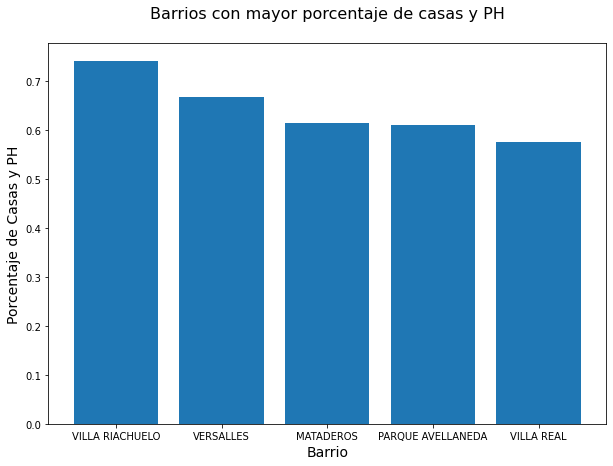

In [33]:
plt.figure(figsize=(10,7))

#Elijo el tipo de gráfico con los datos, el color y la opacidad, entre otros.
plt.bar(porcentaje_casas_ph.sort_values()[::-1][:5].index, porcentaje_casas_ph.sort_values()[::-1][:5])

#Elijo los títulos de los ejes con sus estilos:
plt.ylabel('Porcentaje de Casas y PH', size=14)
plt.xlabel('Barrio', size=14)
plt.title('Barrios con mayor porcentaje de casas y PH', size=16, pad=25)

#Ajustes adicionales:
plt.grid(False)

#Mostar el gráfico:
plt.show();

In [34]:
porcentaje_casas=df_filtered[df_filtered.property_type.isin(['house'])].groupby('barrio').count().property_type/total_propiedades
print('barrios con mayor porcentaje de casas: \n', porcentaje_casas.sort_values()[::-1][:5]) 

barrios con mayor porcentaje de casas: 
 barrio
VERSALLES          0.434783
VILLA RIACHUELO    0.391304
VILLA DEVOTO       0.375862
AGRONOMIA          0.367347
MATADEROS          0.363636
Name: property_type, dtype: float64


Para darnos una idea de las diferencias entre los porcentajes de edificios y casas en estos barrios, vamos a graficarlos en forma de torta.

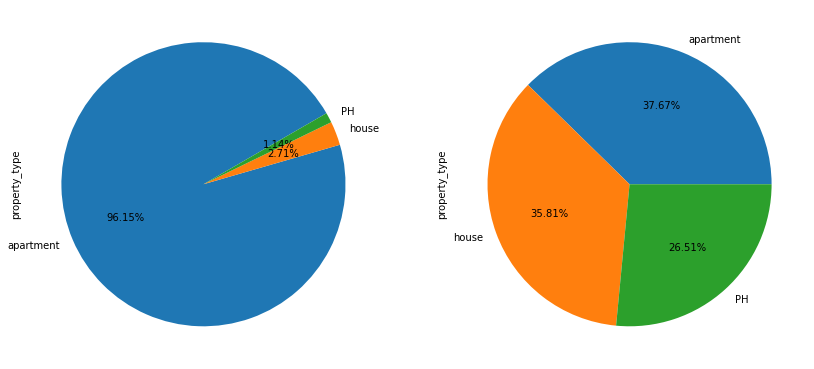

In [35]:
barrios_casas=porcentaje_casas_ph.sort_values()[::-1][:5].index
barrios_edificios=porcentaje_edificios.sort_values()[::-1][:5].index
fig,axs=plt.subplots(1,2,figsize=(14,7))
df_filtered[df_filtered.barrio.isin(barrios_edificios)].property_type.value_counts().plot(x=None, y=None, kind='pie', startangle=30, ax=axs[0],autopct='%1.2f%%')
df_filtered[df_filtered.barrio.isin(barrios_casas)].property_type.value_counts().plot(x=None, y=None, kind='pie', ax=axs[1],autopct='%1.2f%%');

### Barrios más caros y más baratos

Veamos primero la distribución del precio por metro cuadrado para todo el dataset. De esta manera, vamos a remover valores que consideremos extremos.

**10)** Tomando el atributo `price_usd_per_m2` **calculo** su **mínimo**, **máximo**, **promedio (mean)**, **mediana (median)** y **desvío estándar (std)**

In [36]:
#muestro en esta celda los cálculos
print('el valor minimo de price_usd_per_m2 es:', df_filtered['price_usd_per_m2'].min(),'usd/m2')
print('el valor maximo de price_usd_per_m2 es:', df_filtered['price_usd_per_m2'].max(),'usd/m2')
print('el valor promedio de price_usd_per_m2 es:', df_filtered['price_usd_per_m2'].mean(),'usd/m2')
print('el valor medio de price_usd_per_m2 es:', df_filtered['price_usd_per_m2'].median(),'usd/m2')
print('la desviacion estandar de price_usd_per_m2 es:', df_filtered['price_usd_per_m2'].std(),'usd/m2')

el valor minimo de price_usd_per_m2 es: 0.9583333333333334 usd/m2
el valor maximo de price_usd_per_m2 es: 142450.14102564106 usd/m2
el valor promedio de price_usd_per_m2 es: 2712.6055908858034 usd/m2
el valor medio de price_usd_per_m2 es: 2519.4725311762722 usd/m2
la desviacion estandar de price_usd_per_m2 es: 1929.6427712366049 usd/m2


También podemos calcular otros estadísticos como los cuartiles. 

**11) Muestro** el **primer y tercer cuartil** y luego también el **rango intercuartilíco**

In [37]:
#muestro los cuartiles en esta celda
df_filtered['price_usd_per_m2'].describe()


count     12984.000000
mean       2712.605591
std        1929.642771
min           0.958333
25%        1965.431463
50%        2519.472531
75%        3139.534884
max      142450.141026
Name: price_usd_per_m2, dtype: float64

In [38]:
q25=df_filtered['price_usd_per_m2'].quantile(0.25)
q75=df_filtered['price_usd_per_m2'].quantile(0.75)
print('cuartil 75:',q75,'cuartil 25:',q25,'rango intercuartilico:',q75-q25)


cuartil 75: 3139.534883720931 cuartil 25: 1965.4314633727913 rango intercuartilico: 1174.1034203481395


### Quitando valores extremos (Outliers)
Elimino aquellas observaciones cuyo precio por metro cuadrado este fuera de los percentiles 10 y 90. De este modo intento remover valores extremos de una manera sencilla para tener un análisis más robusto.

In [39]:
q10,q90=df_filtered['price_usd_per_m2'].quantile([0.10,0.9])
q10,q90

(1477.9227053140096, 4000.0)

In [40]:
df_filtered2=df_filtered[(df_filtered.price_usd_per_m2>=q10)&(df_filtered.price_usd_per_m2<=q90)]

A partir de quitar estos valores van a cambiar los estadísticos que calcule.

**12) Volvemos a calcular** los mismos estadísticos (min, max, promedio, etc) para ver los cambios.
¿Por qué será que la **mediana** no cambia?

In [41]:
#realizo los calculos en esta celda
print('el valor minimo de price_usd_per_m2 es:', df_filtered2['price_usd_per_m2'].min(),'usd/m2')
print('el valor maximo de price_usd_per_m2 es:', df_filtered2['price_usd_per_m2'].max(),'usd/m2')
print('el valor promedio de price_usd_per_m2 es:', df_filtered2['price_usd_per_m2'].mean(),'usd/m2')
print('el valor medio de price_usd_per_m2 es:', df_filtered2['price_usd_per_m2'].median(),'usd/m2')
print('la desviacion estandar de price_usd_per_m2 es:', df_filtered2['price_usd_per_m2'].std(),'usd/m2')

el valor minimo de price_usd_per_m2 es: 1478.2608695652175 usd/m2
el valor maximo de price_usd_per_m2 es: 4000.0 usd/m2
el valor promedio de price_usd_per_m2 es: 2562.7469262677464 usd/m2
el valor medio de price_usd_per_m2 es: 2521.12676056338 usd/m2
la desviacion estandar de price_usd_per_m2 es: 607.8898187891708 usd/m2


La mediana no cambia porque se está eliminando la misma cantidad de datos en ambos extremos. Esto quiere decir que sigue existiendo el 50% de datos del lado izquierdo y 50% del lado derecho de la mediana.

Grafico ahora los barrios según el precio por metro cuadrado.

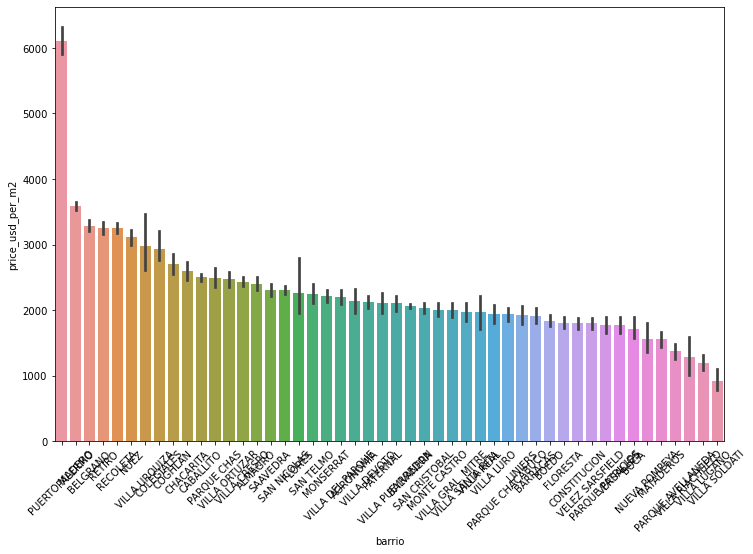

In [42]:
plt.xticks(rotation=45)
barrios=df_filtered.groupby('barrio').mean().sort_values('price_usd_per_m2', ascending=False).index
sns.barplot(x='barrio',y='price_usd_per_m2',order=barrios, data=df_filtered);

#### Más caros

In [43]:
tabla=pd.pivot_table(df, index=['barrio'],values= 'price_usd_per_m2', aggfunc=np.mean)
mas_caros=tabla.sort_values('price_usd_per_m2', ascending=False).iloc[:5]
mas_caros

,price_usd_per_m2
barrio,
PUERTO MADERO,6156.633183
PALERMO,3632.057960
RETIRO,3417.635657
RECOLETA,3346.748987
BELGRANO,3338.725206


#### Más baratos

In [44]:
tabla=pd.pivot_table(df, index=['barrio'],values= 'price_usd_per_m2', aggfunc=np.mean)
mas_baratos=tabla.sort_values('price_usd_per_m2', ascending=True).iloc[:5]
mas_baratos

,price_usd_per_m2
barrio,
VILLA SOLDATI,920.825753
VILLA LUGANO,1179.846071
VILLA RIACHUELO,1274.809950
PARQUE AVELLANEDA,1386.260577
NUEVA POMPEYA,1539.235869


### Barrios que quieren ser otros

Basado en información de mercado, desde el portal Properati han señalado que las inmobiliarias suelen publicar las propiedades ubicadas en barrios que no necesariamente se corresponden con la ubicación geográfica real. Según mencionan en la nota ([blog)](http://blog.properati.com.ar/barrios-que-quieren-ser-otros/), esto corresponde a una lógica comercial en el corredor norte y a usos y costumbres en zona oeste.

Analicemos qué sucede para nuestro dataset.

Dada la estructura del atributo `place_with_parent_names`, en primer lugar vamos a extraer el campo asociado al barrio publicado para poder comparar con el que surge de la cartografía oficial. Esto lo vamos a agregar en una nueva columna llamada `barrio_publicado`. 

De este modo, lo que vamos a analizar es como se relacionan las columnas `barrio` y `barrio publicado`. Si efectivamente hay barrios que quieren ser otros, esperaríamos ver propiedades ubicadas en geográficamente en un barrio distinto al que dice la publicación. Por ejemplo, si una propiedad está ubicada (dadas sus coordenadas) en Villa Crespo pero en la publicación dice Palermo, entonces decimos que hay indicios que Villa Crespo quiere ser Palermo.

Viendo la estructura de este atributo, podemos notar que se compone por una sequencia de lugares separados por `|`. Por ejemplo, en `|Argentina|Capital Federal|Palermo|` vemos que primero está el país, luego la ciudad, luego el barrio y en algunos casos hay una jerarquía más, relacionado con zonas dentro del barrio (como Palermo Soho dentro de Palermo). 

De este modo, una estrategia posible para resolver esto es separar las jerarquías por `|` y extraer el elemento asociado al barrio. Por ejemplo, para `|Argentina|Capital Federal|Palermo|` queda `['', 'Argentina', 'Capital Federal', 'Palermo', '']`. Extrayendo el tercer elemento obtendremos el barrio independientemente de si hay lugares luego en la jerarquía. Aquellos que no tengan barrio no serán considerados puesto que estarían ubicados en Capital Federal y no sería informativo.

Lo pasamos a mayúsculas y quitamos las tildes para poder comparar con el barrio oficial.

In [45]:
df['barrio_publicado']=df['place_with_parent_names'].str.split('|', expand=True).iloc[:,3]
df.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,barrio_publicado
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,PALERMO,14.0,Palermo
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local...,PALERMO,14.0,Palermo
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local...,PALERMO,14.0,Palermo
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local...,PALERMO,14.0,Palermo
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local...,PALERMO,14.0,Barrio Norte


In [46]:
df['barrio_publicado']=df['barrio_publicado'].str.upper()
df.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,barrio_publicado
0,2017-09-22,sell,house,|Argentina|Capital Federal|Palermo|Palermo Viejo|,"-34.5889531469,-58.4298817776",-34.588953,-58.429882,2000000.0,312.0,NaN,6410.256410,NaN,NaN,NaN,https://www.properati.com.ar/2os_venta_casa_pa...,PALERMO,14.0,PALERMO
1,2017-08-01,sell,store,|Argentina|Capital Federal|Palermo|,"-34.586069,-58.414431",-34.586069,-58.414431,790000.0,121.0,121.0,6528.925620,NaN,NaN,NaN,https://www.properati.com.ar/1cl7l_venta_local...,PALERMO,14.0,PALERMO
2,2017-08-02,sell,store,|Argentina|Capital Federal|Palermo|Palermo Soho|,"-34.589723,-58.4325664",-34.589723,-58.432566,343000.0,122.0,108.0,2811.475410,NaN,2.0,NaN,https://www.properati.com.ar/1cm8w_venta_local...,PALERMO,14.0,PALERMO
3,2017-08-03,sell,store,|Argentina|Capital Federal|Palermo|,"-34.5923646,-58.4144028",-34.592365,-58.414403,145000.0,24.0,24.0,6041.666667,NaN,NaN,NaN,https://www.properati.com.ar/1covk_venta_local...,PALERMO,14.0,PALERMO
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local...,PALERMO,14.0,BARRIO NORTE


In [47]:
import unicodedata
df['barrio_publicado']=df['barrio_publicado'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df.tail(15)

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,barrio_publicado
18964,2017-09-30,sell,apartment,|Argentina|Capital Federal|Villa Lugano|,"-34.6650164,-58.4431386",-34.665016,-58.443139,50000.00,70.0,70.0,714.285714,NaN,4.0,NaN,https://www.properati.com.ar/1fnpn_venta_depar...,VILLA SOLDATI,8.0,VILLA LUGANO
18965,2017-10-17,sell,house,|Argentina|Capital Federal|Villa Soldati|,"-34.6579271,-58.4327115",-34.657927,-58.432712,105000.00,NaN,NaN,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1glpm_venta_casa_...,VILLA SOLDATI,8.0,VILLA SOLDATI
18966,2017-10-17,sell,house,|Argentina|Bs.As. G.B.A. Zona Sur|Lanús|,"-34.6651916,-58.4393973",-34.665192,-58.439397,90000.00,NaN,NaN,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1goie_venta_casa_...,VILLA SOLDATI,8.0,LANUS
18967,2017-10-17,sell,PH,|Argentina|Capital Federal|Villa Soldati|,"-34.6601955,-58.4489907",-34.660196,-58.448991,124000.00,160.0,120.0,775.000000,NaN,NaN,NaN,https://www.properati.com.ar/1grdk_venta_ph_vi...,VILLA SOLDATI,8.0,VILLA SOLDATI
18968,2017-10-21,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.6633106,-58.43915",-34.663311,-58.439150,90000.00,NaN,60.0,NaN,NaN,NaN,NaN,https://www.properati.com.ar/1hbft_venta_depar...,VILLA SOLDATI,8.0,VILLA SOLDATI
18969,2017-10-21,sell,house,|Argentina|Capital Federal|Villa Lugano|,"-34.6640573,-58.4443398",-34.664057,-58.444340,115000.00,120.0,100.0,958.333333,NaN,3.0,NaN,https://www.properati.com.ar/1hbhx_venta_casa_...,VILLA SOLDATI,8.0,VILLA LUGANO
18970,2017-10-29,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.669288,-58.443725",-34.669288,-58.443725,50000.00,75.0,75.0,666.666667,NaN,4.0,NaN,https://www.properati.com.ar/1hlfv_venta_depar...,VILLA SOLDATI,8.0,VILLA SOLDATI
18971,2017-10-29,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.669535,-58.444304",-34.669535,-58.444304,49900.00,75.0,75.0,665.333333,NaN,4.0,NaN,https://www.properati.com.ar/1hlg3_venta_depar...,VILLA SOLDATI,8.0,VILLA SOLDATI
18972,2017-11-23,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.6660551661,-58.4419339087",-34.666055,-58.441934,50000.00,72.0,72.0,694.444444,7.0,4.0,NaN,https://www.properati.com.ar/1ie0c_venta_depar...,VILLA SOLDATI,8.0,VILLA SOLDATI
18973,2017-12-17,sell,apartment,|Argentina|Capital Federal|Villa Soldati|,"-34.66897,-58.443897",-34.668970,-58.443897,49000.00,75.0,75.0,653.333333,NaN,4.0,NaN,https://www.properati.com.ar/1j22x_venta_depar...,VILLA SOLDATI,8.0,VILLA SOLDATI


Como algunos tienen 4 elementos, debemos quitarlos.

Comparemos entonces el barrio publicado con el real. Nos vamos a quedar con aquellas propiedades donde nos coincidan para luego hacer el conteo por barrio.

In [48]:
df_barrio_similar=df[df['barrio_publicado']!=df['barrio']]
df_barrio_similar.head()

,created_on,operation,property_type,place_with_parent_names,lat-lon,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,floor,rooms,expenses,properati_url,barrio,comuna,barrio_publicado
4,2017-08-08,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.585652875,-58.4114933233",-34.585653,-58.411493,175000.0,24.0,24.0,7291.666667,NaN,NaN,NaN,https://www.properati.com.ar/1csk7_venta_local...,PALERMO,14.0,BARRIO NORTE
6,2017-08-11,sell,store,|Argentina|Capital Federal|Belgrano|,"-34.5739059,-58.4391946",-34.573906,-58.439195,100000.0,26.0,NaN,3846.153846,NaN,NaN,NaN,https://www.properati.com.ar/1d36i_venta_local...,PALERMO,14.0,BELGRANO
11,2017-08-16,sell,store,|Argentina|Capital Federal|Barrio Norte|,"-34.584198,-58.4152675",-34.584198,-58.415268,170000.0,70.0,70.0,2428.571429,NaN,NaN,2800.0,https://www.properati.com.ar/1dcnv_venta_local...,PALERMO,14.0,BARRIO NORTE
14,2017-08-26,sell,store,|Argentina|Capital Federal|Belgrano|,"-34.5699614,-58.4323397",-34.569961,-58.432340,685000.0,185.0,185.0,3702.702703,NaN,NaN,NaN,https://www.properati.com.ar/1dv8b_venta_local...,PALERMO,14.0,BELGRANO
40,2017-09-01,sell,apartment,|Argentina|Capital Federal|Barrio Norte|,"-34.57548904,-58.41962433",-34.575489,-58.419624,510000.0,239.0,127.0,2133.891213,NaN,2.0,NaN,https://www.properati.com.ar/1e66w_venta_depar...,PALERMO,14.0,BARRIO NORTE


In [49]:
df_barrio_similar.groupby('barrio').barrio.count().sort_values(ascending=False)

barrio
RECOLETA             656
BALVANERA            545
PALERMO              534
SAN NICOLAS          467
NUEZ                 436
RETIRO               351
MONSERRAT            219
FLORES               183
ALMAGRO              182
CONSTITUCION         174
CABALLITO            156
COLEGIALES           139
VILLA GRAL. MITRE    138
VILLA CRESPO         136
VILLA ORTUZAR        134
PARQUE CHACABUCO     125
VELEZ SARSFIELD      123
LINIERS              122
CHACARITA            107
NUEVA POMPEYA        103
MONTE CASTRO          98
BELGRANO              83
SAAVEDRA              79
VILLA URQUIZA         79
PARQUE AVELLANEDA     77
PARQUE CHAS           69
VILLA LURO            56
SAN CRISTOBAL         55
VILLA SANTA RITA      54
COGHLAN               49
VILLA DEVOTO          49
MATADEROS             44
VILLA DEL PARQUE      42
BOCA                  41
PARQUE PATRICIOS      38
BARRACAS              36
VILLA REAL            34
FLORESTA              33
AGRONOMIA             33
SAN TELMO         

Con una tabla de doble entrada podemos identificar para cada barrio cuál es al que más quiere parecerse.

In [50]:
tabla2=pd.crosstab(df_barrio_similar['barrio'],df_barrio_similar['barrio_publicado'])
tabla2.idxmax(axis=1)

barrio
AGRONOMIA                VILLA PUEYRREDON
ALMAGRO                             BOEDO
BALVANERA                            ONCE
BARRACAS                        SAN TELMO
BELGRANO                            NUNEZ
BOCA                             BARRACAS
BOEDO                    PARQUE PATRICIOS
CABALLITO                           BOEDO
CHACARITA                      COLEGIALES
COGHLAN                          BELGRANO
COLEGIALES                       BELGRANO
CONSTITUCION                    SAN TELMO
FLORES                          CABALLITO
FLORESTA                           FLORES
LINIERS                  VILLA SANTA RITA
MATADEROS               PARQUE AVELLANEDA
MONSERRAT                       SAN TELMO
MONTE CASTRO                     FLORESTA
NUEVA POMPEYA                     POMPEYA
NUEZ                                NUNEZ
PALERMO                          BELGRANO
PARQUE AVELLANEDA                FLORESTA
PARQUE CHACABUCO                CABALLITO
PARQUE CHAS                

**Conclusión:** Podemos ver entonces que los barrios tienden a querer parecerse a barrios con precio con metro cuadrado más caro. Por ejemplo Villa Crespo con Palermo, Constitución con San Telmo y Villa Urquiza con Belgrano. 
Por otro lado, vemos también que los barrios suelen querer parecerse a sus barrios vecinos.
*By*: **Fernando Emmanuel Quintana**

*By*: **Fernando Emmanuel Quintana**